In [28]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
sns.set_style('whitegrid')
%matplotlib inline
print("complete")

complete


In [29]:
from sklearn.datasets import fetch_california_housing

In [30]:
housing = fetch_california_housing()

In [31]:
# Access the data and target variables
X = housing.data
y = housing.target

# Print the shape of the data
print("Data shape:", X.shape)

# Print the names of the features
print("Feature names:", housing.feature_names)

# Print the description of the dataset
print("Dataset description:")
print(housing.DESCR)

Data shape: (20640, 8)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Dataset description:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.htm

Text(0, 0.5, 'Number of houses')

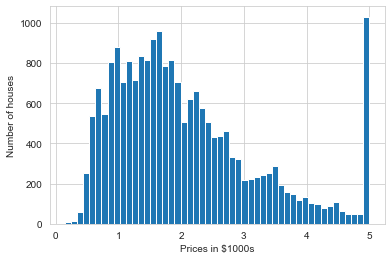

In [32]:
plt.hist(housing.target,bins=50)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

Text(0.5, 0, 'Number of rooms')

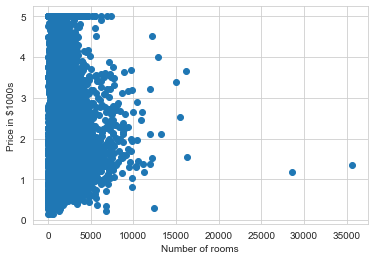

In [33]:
plt.scatter(housing.data[:,4],housing.target)
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)

In [37]:
# Decision Tree Regression
tree_reg = DecisionTreeRegressor()
tree_params = {'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2, 5]}
tree_reg_cv = GridSearchCV(tree_reg, tree_params, scoring='neg_mean_squared_error')
tree_reg_cv.fit(X_train, y_train)
tree_reg_best = tree_reg_cv.best_estimator_
tree_reg_predictions = tree_reg_best.predict(X_test)
tree_reg_mse = mean_squared_error(y_test, tree_reg_predictions)
tree_reg_r2 = r2_score(y_test, tree_reg_predictions)

In [38]:
# Random Forest Regression
rf_reg = RandomForestRegressor()
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
rf_reg_cv = GridSearchCV(rf_reg, rf_params, scoring='neg_mean_squared_error')
rf_reg_cv.fit(X_train, y_train)
rf_reg_best = rf_reg_cv.best_estimator_
rf_reg_predictions = rf_reg_best.predict(X_test)
rf_reg_mse = mean_squared_error(y_test, rf_reg_predictions)
rf_reg_r2 = r2_score(y_test, rf_reg_predictions)

In [39]:
# Print the performance metrics
print("Linear Regression:")
print("  MSE:", linear_reg_mse)
print("  R^2:", linear_reg_r2)
print("Decision Tree Regression:")
print("  Best Parameters:", tree_reg_cv.best_params_)
print("  MSE:", tree_reg_mse)
print("  R^2:", tree_reg_r2)
print("Random Forest Regression:")
print("  Best Parameters:", rf_reg_cv.best_params_)
print("  MSE:", rf_reg_mse)
print("  R^2:", rf_reg_r2)

Linear Regression:
  MSE: 0.5305677824766754
  R^2: 0.5957702326061662
Decision Tree Regression:
  Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5}
  MSE: 0.3938792265353086
  R^2: 0.6999107119161907
Random Forest Regression:
  Best Parameters: {'max_depth': None, 'n_estimators': 300}
  MSE: 0.2518883215254899
  R^2: 0.8080909527823654


Best model = Decision Tree